In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /Users/aoife/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aoife/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/aoife/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/aoife/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [7]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [9]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [11]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2008_2012.dtypes

/var/folders/77/z42459tx3fs25jmqw010j1f40000gn/T/ipykernel_4762/3177155401.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

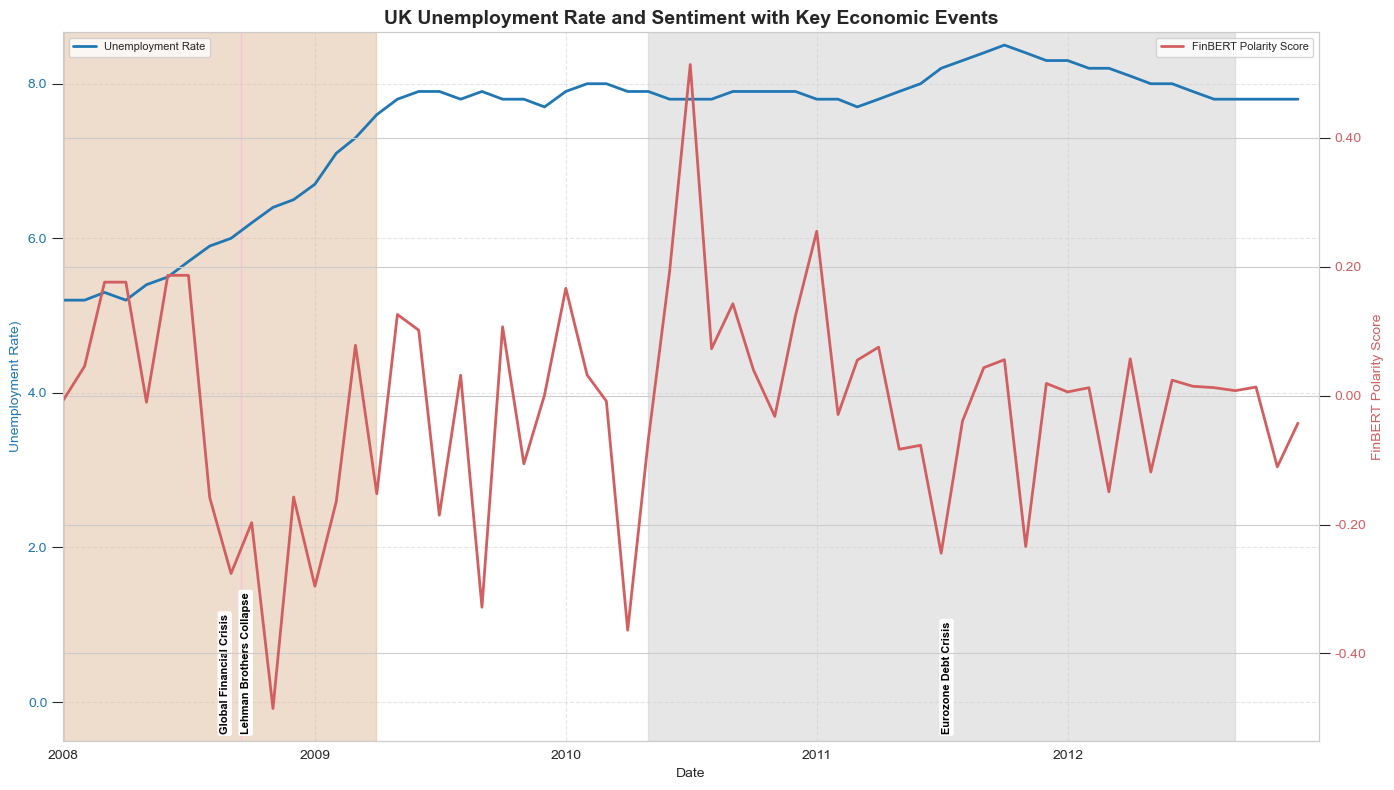

In [13]:
# Filter data from 1 Jan 2008 onwards
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['unemployment_rate', 'polarity_score_finbert'])

# Define the key economic events dictionary
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Apply a Seaborn style
sns.set_style('whitegrid')

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- CPI Plot ---
color_cpi = '#2077b4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Unemployment Rate)', color=color_cpi, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['unemployment_rate'], color=color_cpi, label='Unemployment Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# --- Sentiment Score Plot ---
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- Event Shading and Labels ---
# Use a Seaborn palette for event colors
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

# Set the y position for the labels to be at the bottom of the chart (y=0)
event_y_position = 0

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    # Skip events that start after the chart's end date
    if start > end_date:
        continue

    # Limit shaded region to chart range
    display_start = max(start, start_date)
    display_end = min(end, end_date)

    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    # Only add label if within visible range
    label_x_pos = display_start + (display_end - display_start) / 2
    if start_date <= label_x_pos <= end_date:
        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'))

    i += 1

# --- Title and Layout ---
plt.title('UK Unemployment Rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Legends ---
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim(bottom=-0.5)  # Ensure the y-axis starts at 0

plt.show()

### Visual analysis shows that UK unemployment rate tends to move inversely to the finBERT sentiment scores, with unemployment rate increasing just as teh sentiment dips into negitive sentimend. Both dips correlate clearly with the two economic events in the timeframe, both are negitive. 

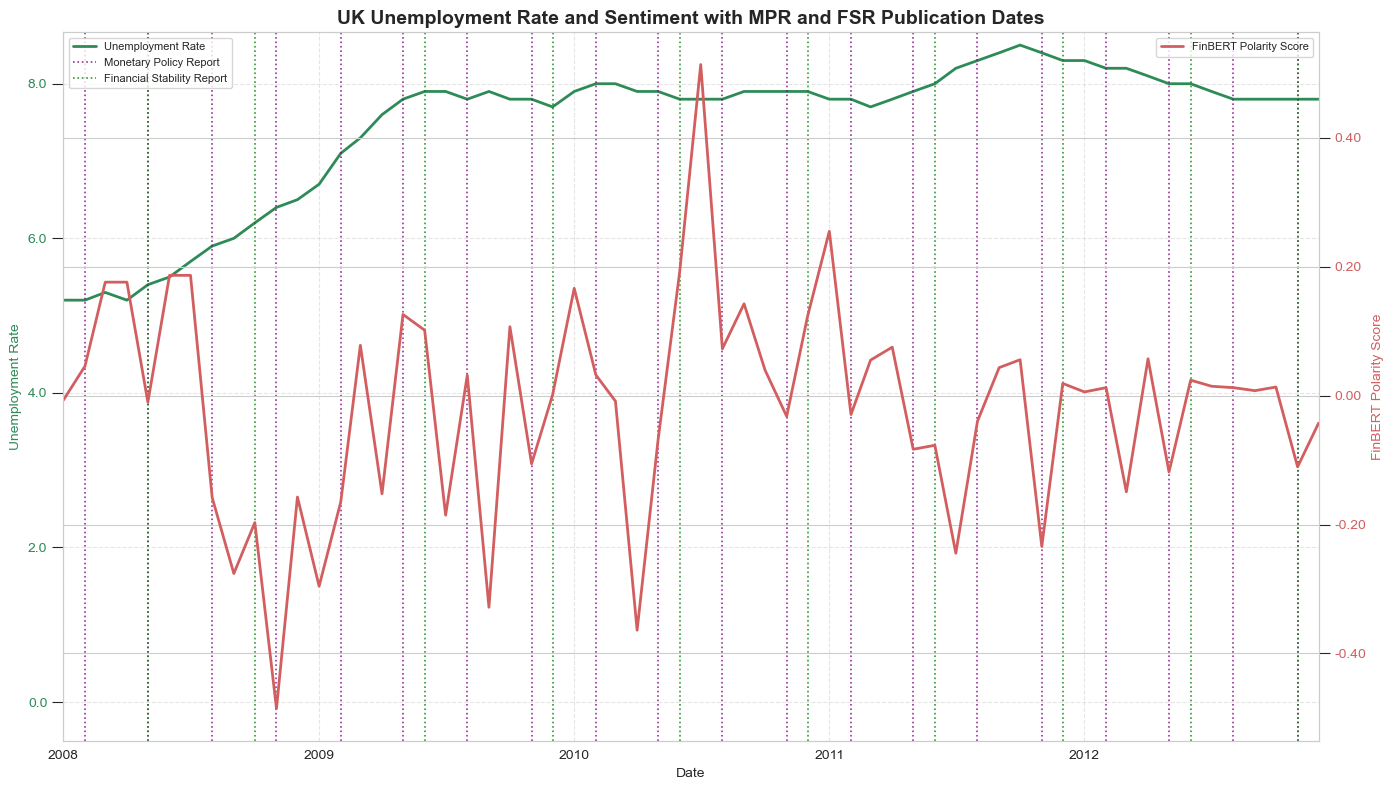

In [16]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['CPI', 'polarity_score_finbert'])

# --- Load Publication Dates from repo ---
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# --- Apply Style ---
sns.set_style('whitegrid')

# --- Plot Setup ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# CPI Line (Left Axis)
color_cpi = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Unemployment Rate', color=color_cpi, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['unemployment_rate'], color=color_cpi, label='Unemployment Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cpi, size=8)

# Sentiment Line (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# --- NEW: Add MPR and FSR Vertical Lines ---

# MPR: Purple Dotted Lines
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# FSR: Green Dotted Lines
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# --- Title and Layout ---
plt.title('UK Unemployment Rate and Sentiment with MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# --- X-Axis Formatting ---
ax1.xaxis.set_major_locator(mdates.YearLocator(1)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# --- Y-Axis Formatting ---
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# --- Deduplicated Legend ---
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

# --- Legend for FinBERT on Right Axis ---
handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# --- Grid and Limits ---
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(bottom=-0.5)

plt.show()

### Drop unncessary columns to reduce the number of variables to be explored

In [18]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

### Rename columns

In [20]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [22]:
# Define the new order of the columns
new_column_order = [
    'Date', 'unemployment_rate', 
    'CPI_pct_change', 'finbert_sentiment_score', 
    'confidence_score','wage_growth_rate', 
    'GDP_pct_change', 'ftse_250_total_return', 
    'BoE_base_rate', '0-2yr_gilts_TReturns'
]


# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,unemployment_rate,CPI_pct_change,finbert_sentiment_score,confidence_score,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,5.2,2.2,-0.007201,-13.0,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,5.2,2.5,0.045560,-17.0,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,5.3,2.5,0.175849,-19.0,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,5.2,3.0,0.175849,-24.0,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,5.4,3.3,-0.010290,-29.0,4.7,-0.5,5657.73,4.916667,164.014


# Correlation analysis

### Create pairplot for visual correlation analysis

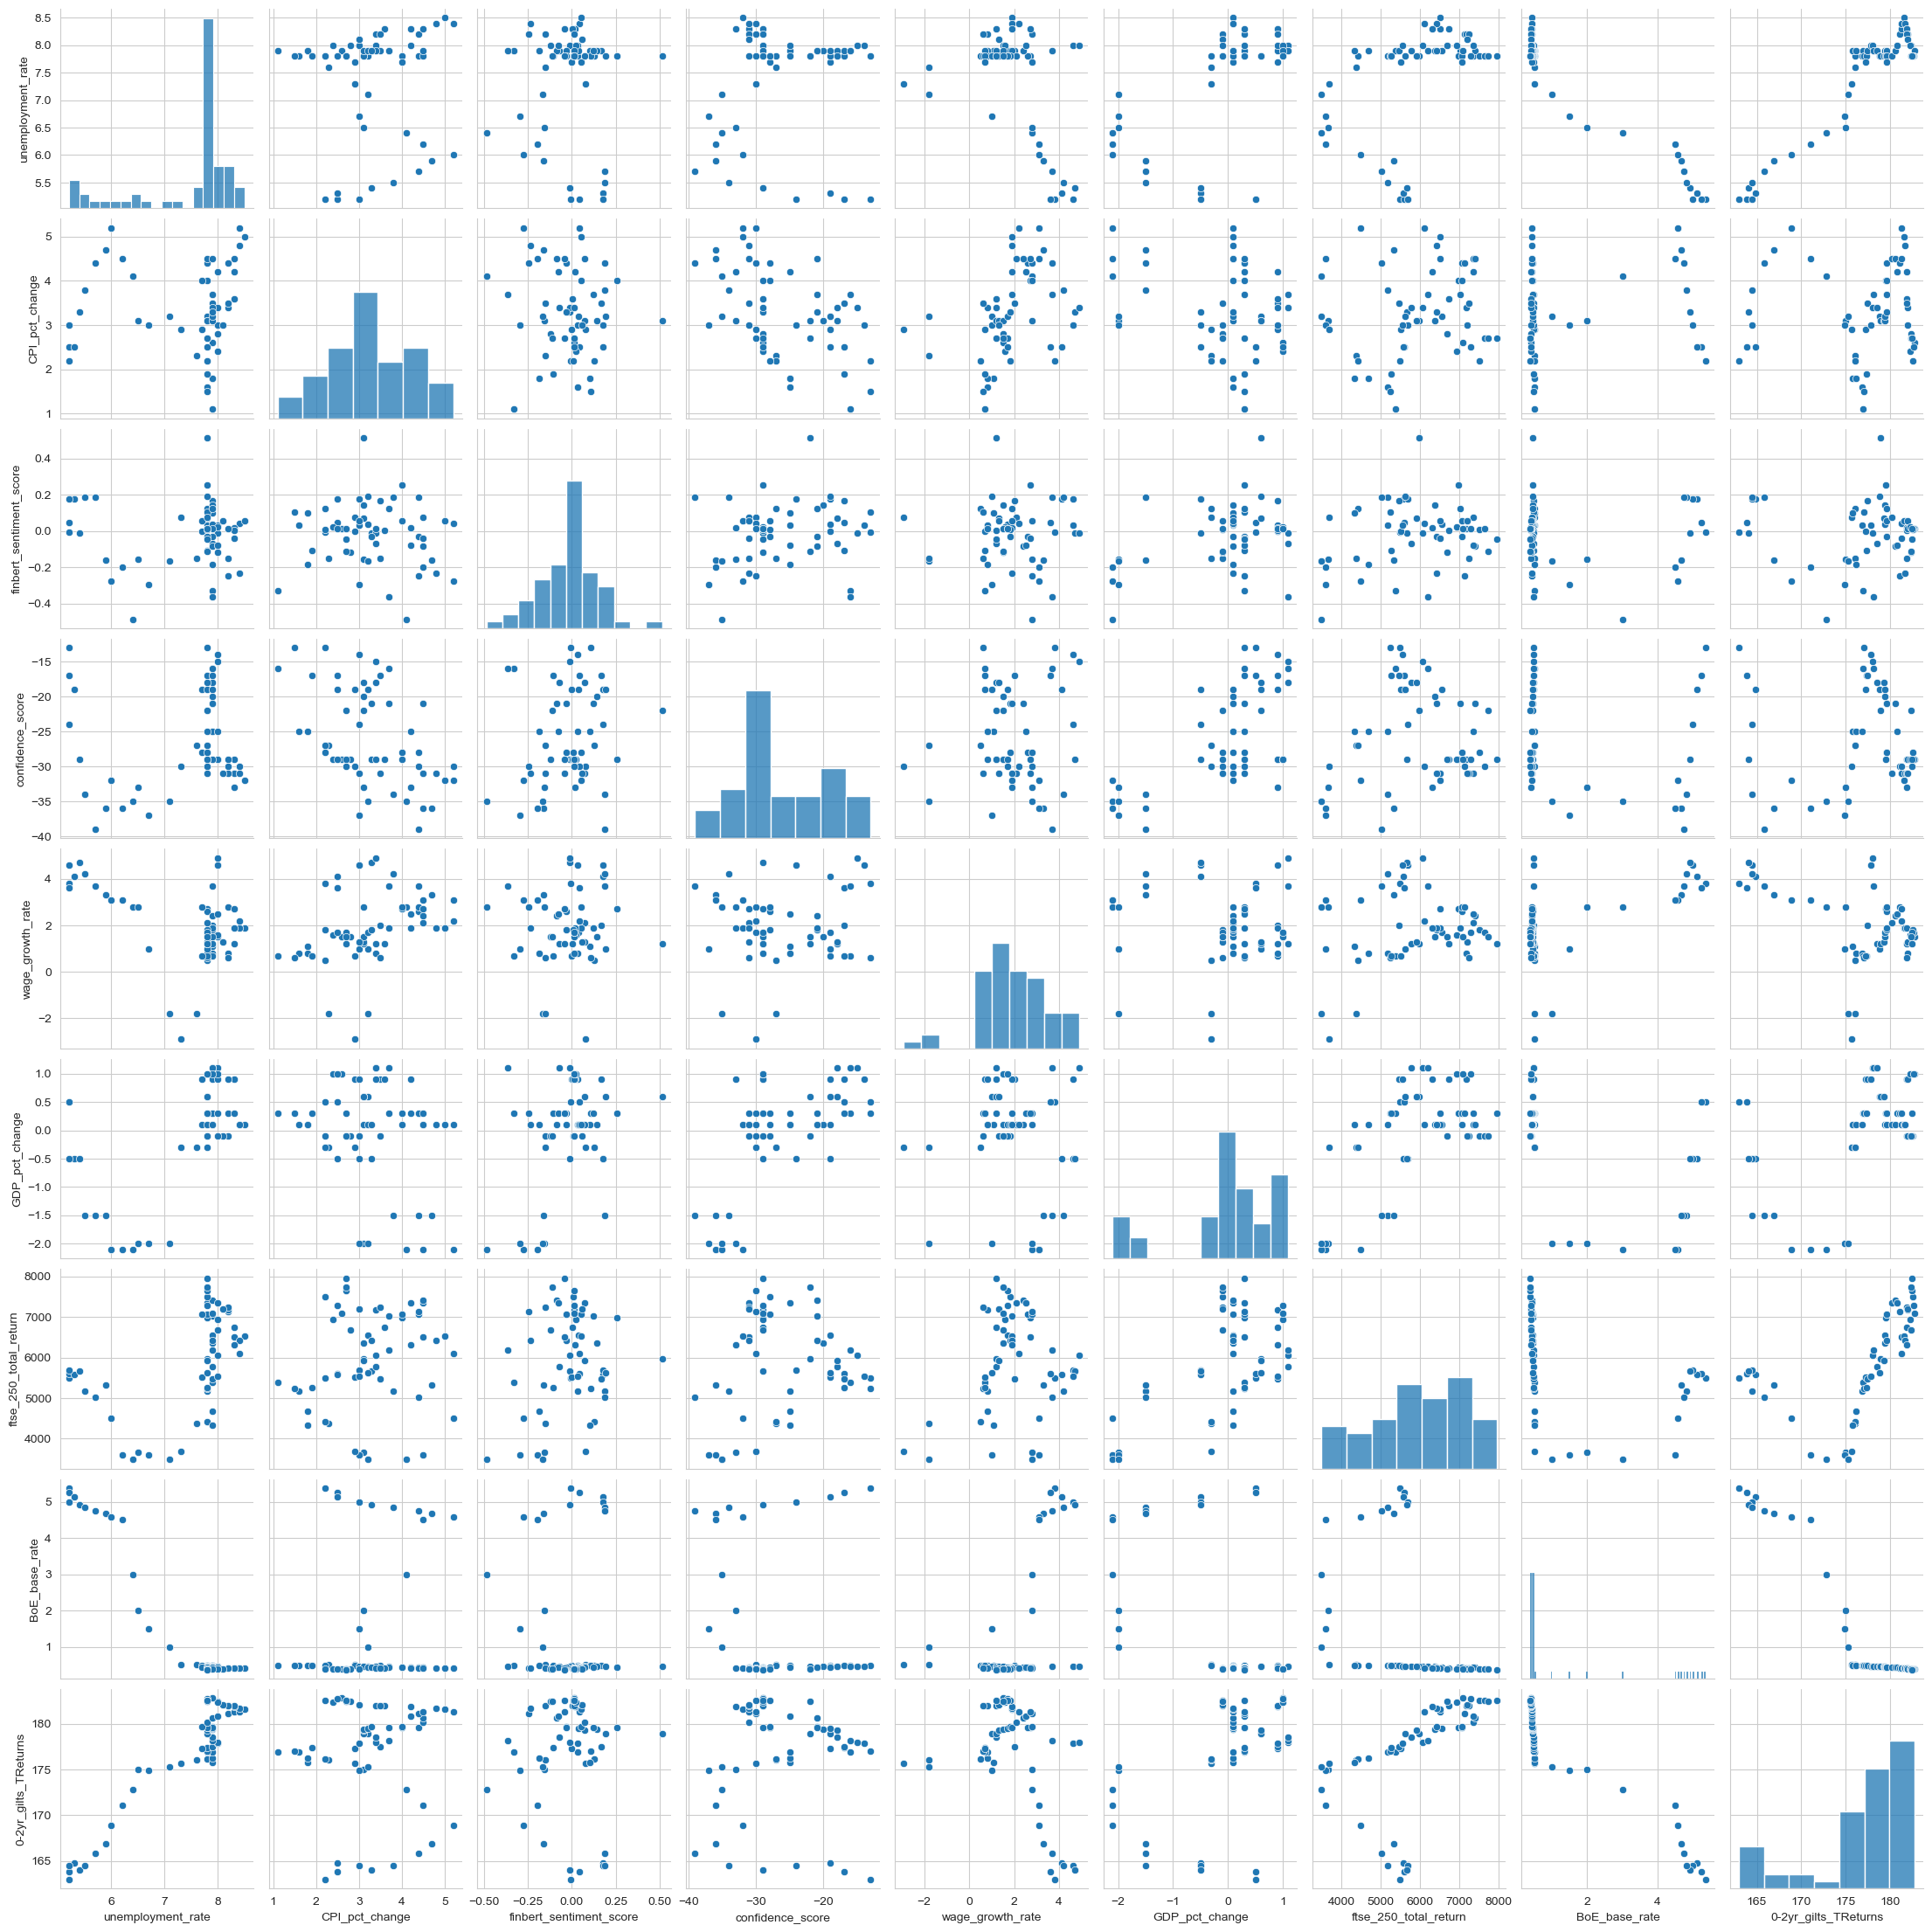

In [24]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

Observaton: No real linear relationships visually present. 

### Create correlation matrices

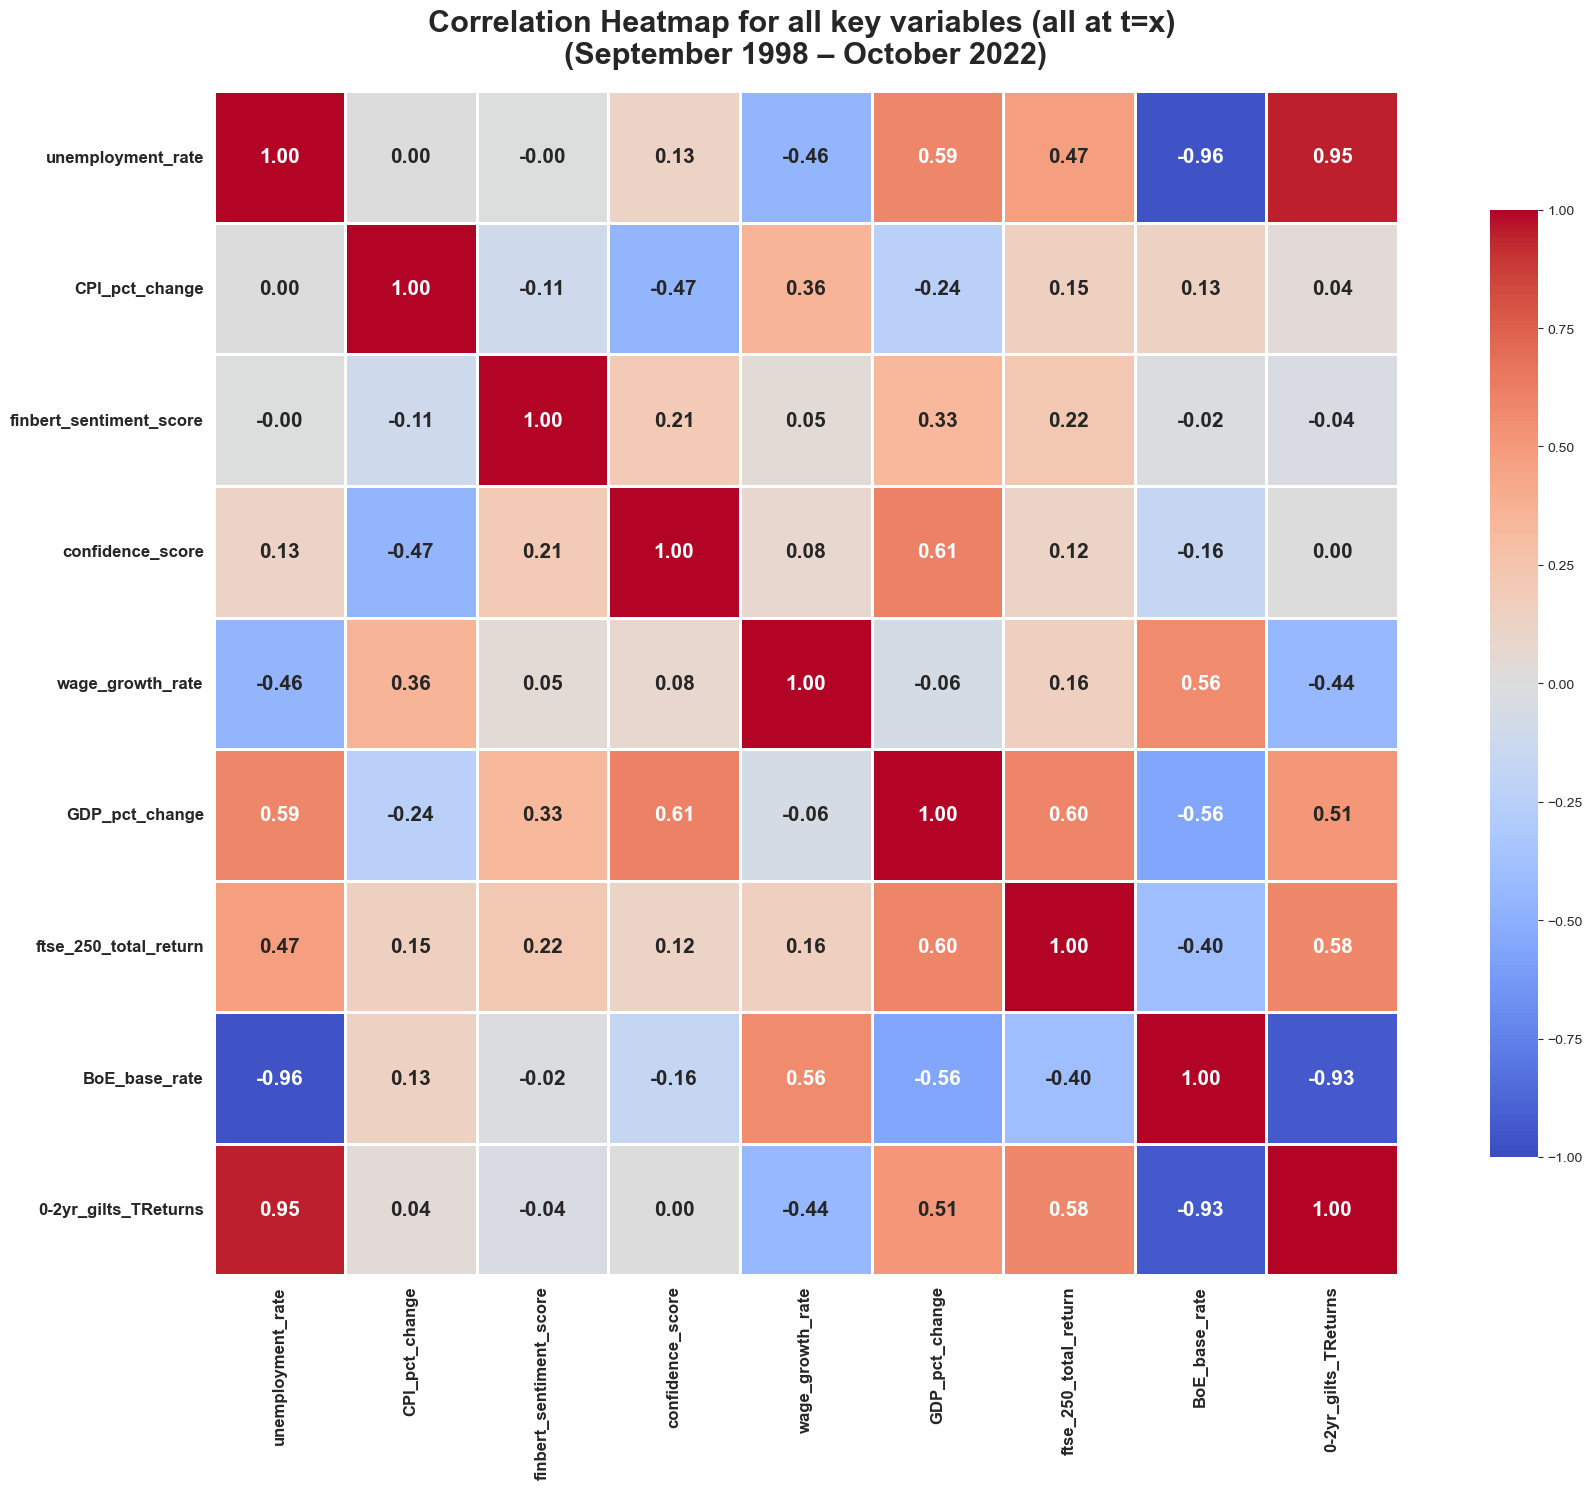

In [27]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for all key variables (all at t=x) \n(September 1998 – October 2022)', 
          fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

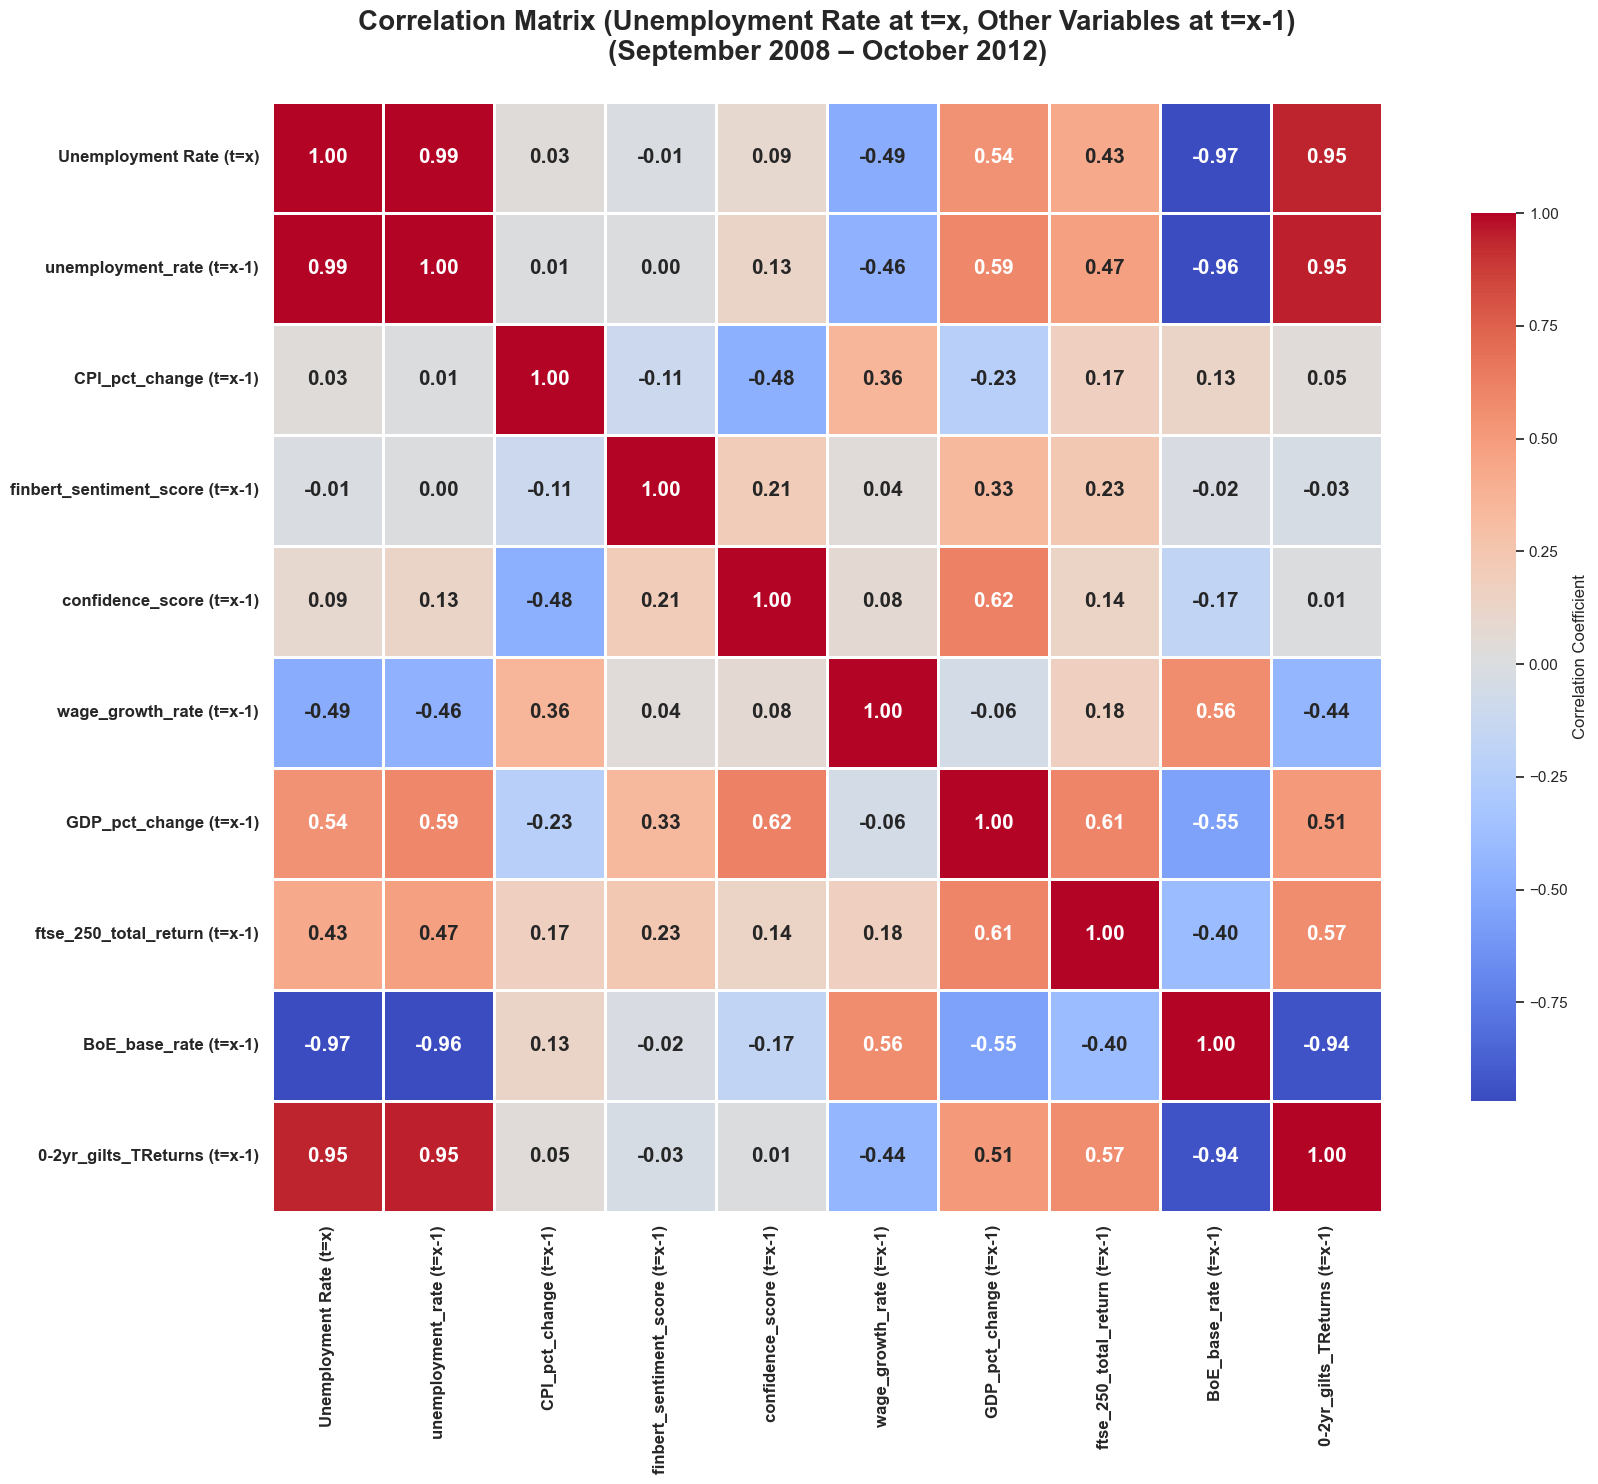

In [29]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'unemployment_rate', 'CPI_pct_change', 
    'finbert_sentiment_score', 'confidence_score',
     'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', 
    '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['unemployment_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'unemployment_rate': 'Unemployment Rate (t=x)'}, inplace=True)

# Add t+1 (1 month lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Unemployment Rate at t=x, Other Variables at t=x-1)\n(September 2008 – October 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

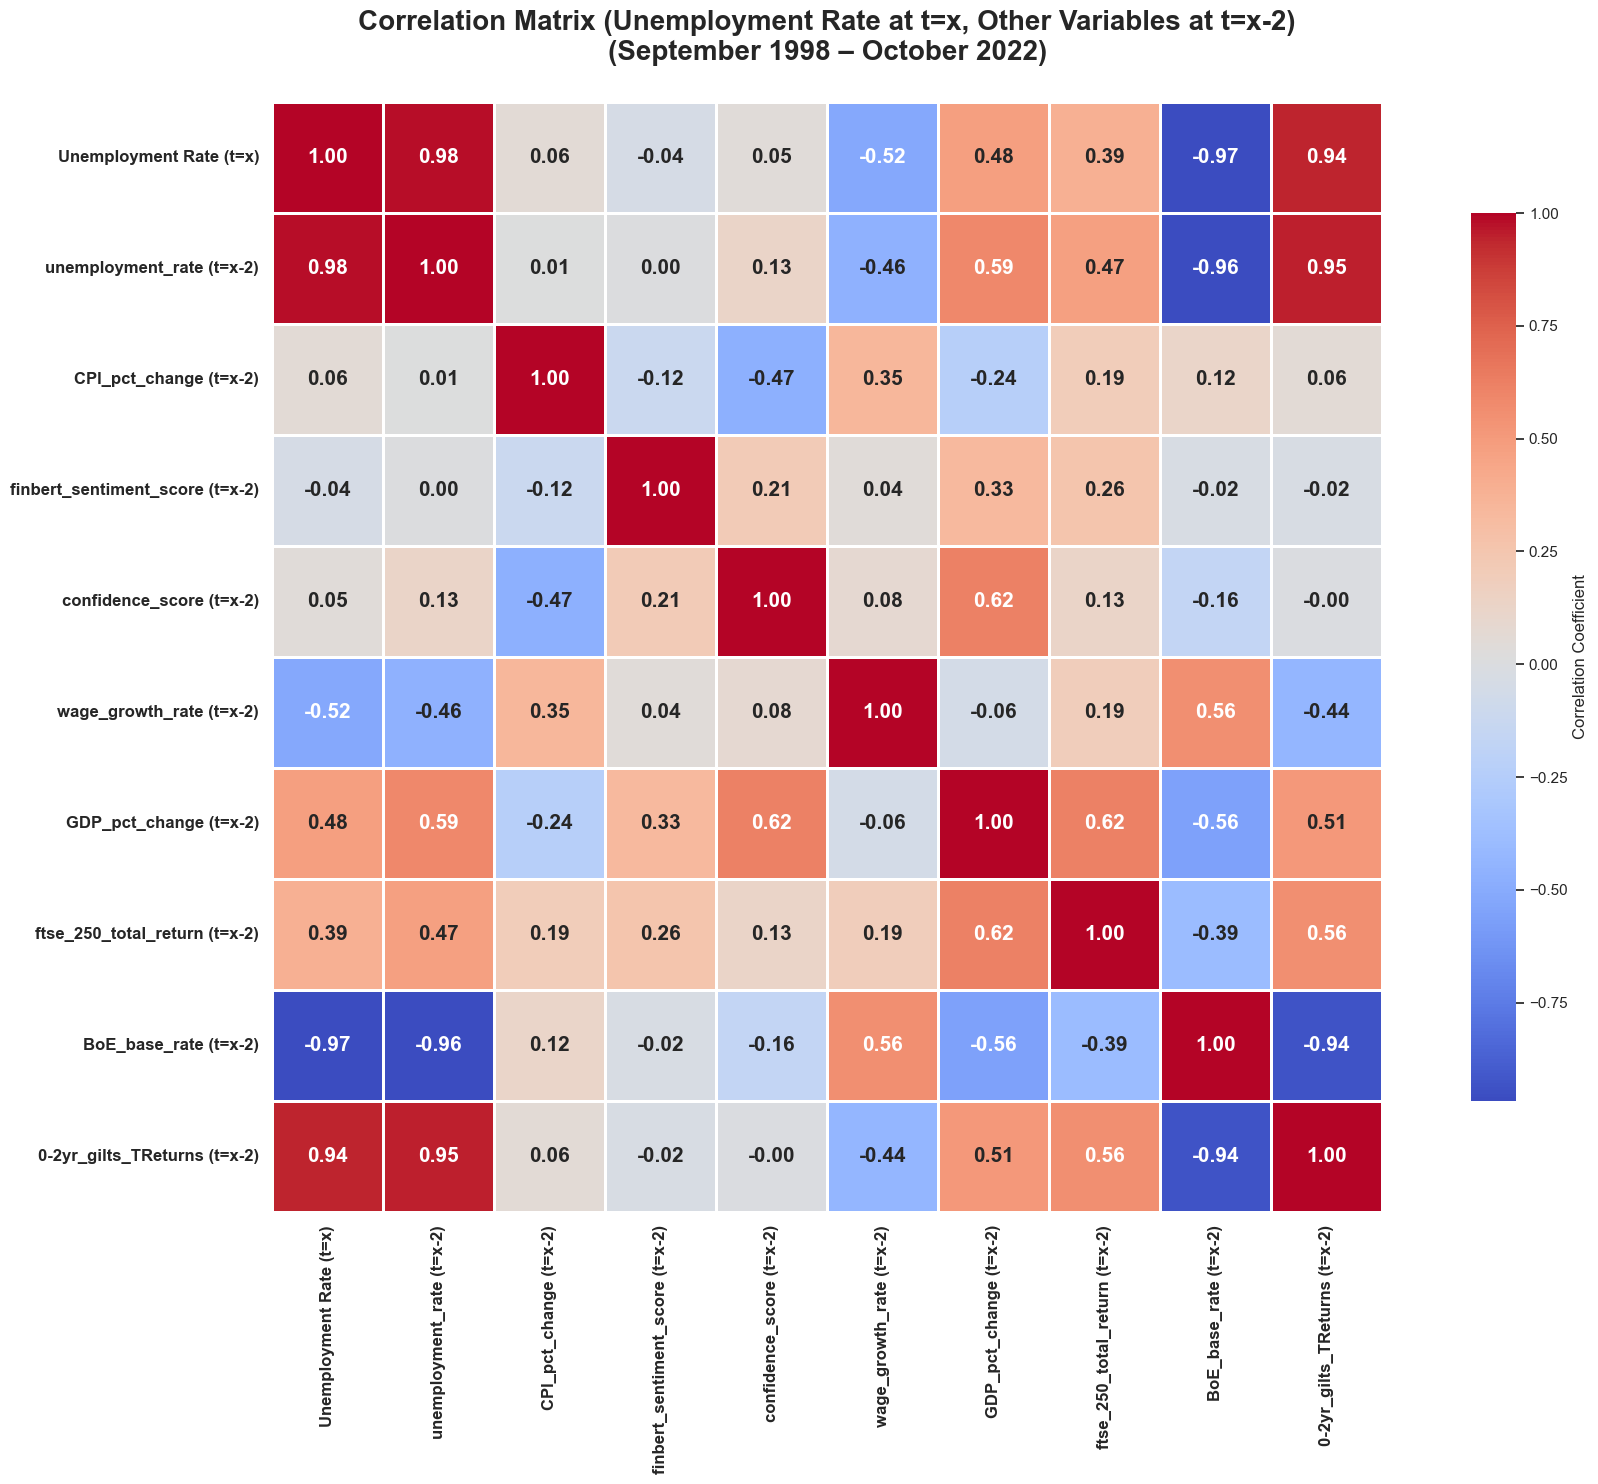

In [31]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'unemployment_rate', 'CPI_pct_change', 
    'finbert_sentiment_score', 'confidence_score',
     'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', 
    '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['unemployment_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'unemployment_rate': 'Unemployment Rate (t=x)'}, inplace=True)

# Add t+2 (2 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Unemployment Rate at t=x, Other Variables at t=x-2)\n(September 1998 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

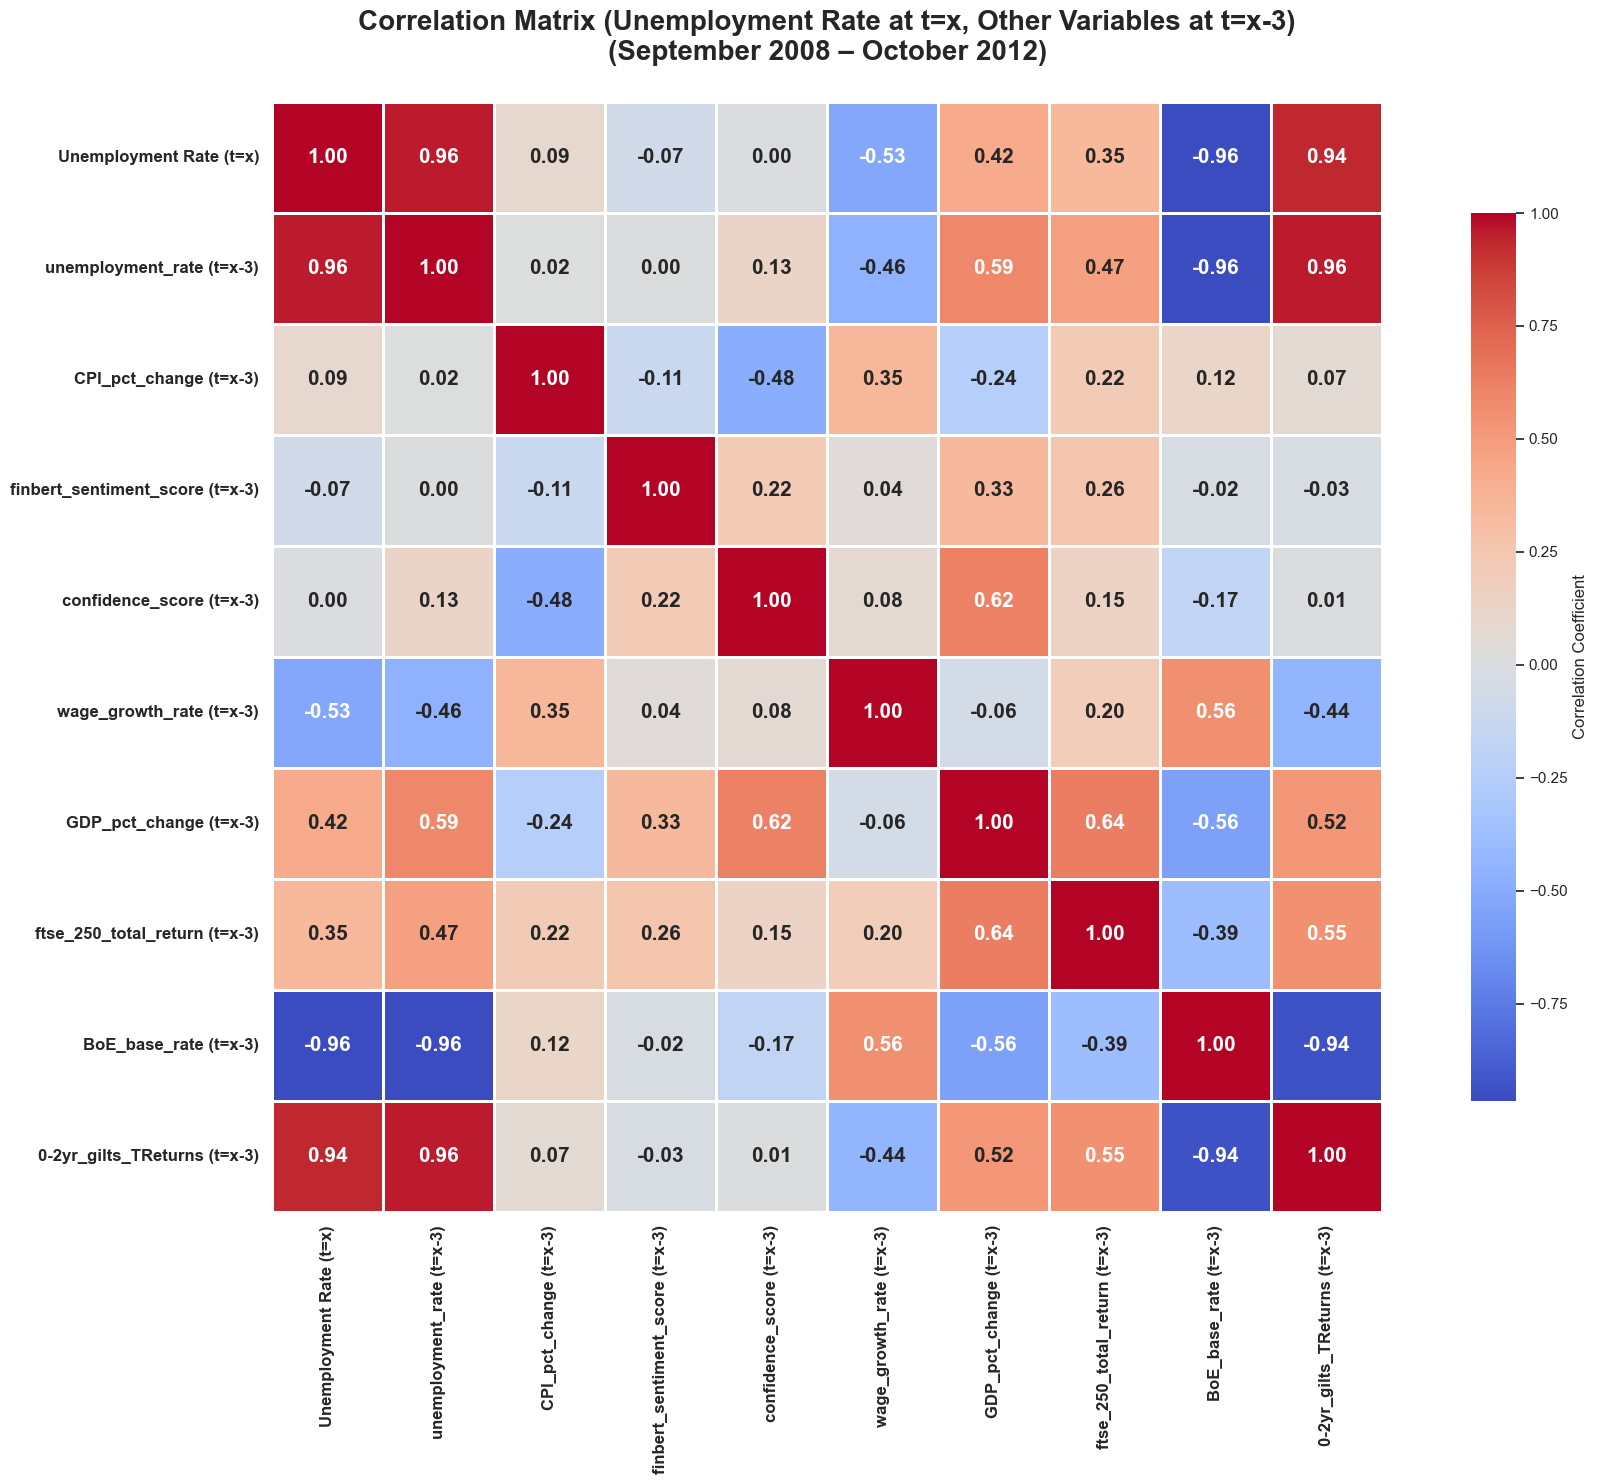

In [33]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns 
columns_of_interest = [ 'unemployment_rate', 'CPI_pct_change', 
    'finbert_sentiment_score', 'confidence_score',
     'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', 
    '0-2yr_gilts_TReturns']

# Create correlation DataFrame
correlation_df = filtered_df[['unemployment_rate']].copy()  # CPI pct change at time t
correlation_df.rename(columns={'unemployment_rate': 'Unemployment Rate (t=x)'}, inplace=True)

# Add t+3 (3 months lag) for all other variables
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

#Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Unemployment Rate at t=x, Other Variables at t=x-3)\n(September 2008 – October 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### From the above matrices, the variables that best correlate with Unemployment Rate at t=0 are Unemployment Rate (t-3),  wage_growth (t-3), ftse_250_total_returns (t=X), BoE_base_rate (t-3) and Gilts (t=x).

#### Therefore these will be used for an initial Multiple Linear Regression analysis to assess predictive ability

# Multiple linear regression: Unemployment Rate vs Lagged Unemployment Rare, Wage Growth,  FTSE250 Total Returns, BoE Base Rate and 02-yr Gilts. 

Note, finbert was very weak so was not carried forward into MLR.

### Prepare regression dataframe

In [38]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']  
regression_df['unemployment_rate (t=x)'] = filtered_df['unemployment_rate']
regression_df['unemployment_rate (t=x-3)'] = filtered_df['unemployment_rate'].shift(3)
regression_df['wage_growth_rate (t=x-3)'] = filtered_df['wage_growth_rate'].shift(3)
regression_df['GDP_pct_change (t=x)'] = filtered_df['GDP_pct_change']
regression_df['ftse_250_total_return (t=x-3)'] = filtered_df['ftse_250_total_return'].shift(3)
regression_df['BoE_base_rate (t=x-3)'] = filtered_df['BoE_base_rate'].shift(3)
regression_df['0-2yr_gilts_TReturns (t=x)'] = filtered_df['0-2yr_gilts_TReturns']

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation or run regression
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,unemployment_rate (t=x),unemployment_rate (t=x-3),wage_growth_rate (t=x-3),GDP_pct_change (t=x),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3),0-2yr_gilts_TReturns (t=x)
unemployment_rate (t=x),1.000000,0.957541,-0.525373,0.741834,0.347425,-0.958230,0.925810
unemployment_rate (t=x-3),0.957541,1.000000,-0.461153,0.816107,0.473833,-0.964581,0.927650
wage_growth_rate (t=x-3),-0.525373,-0.461153,1.000000,-0.414738,0.196740,0.561446,-0.389607
GDP_pct_change (t=x),0.741834,0.816107,-0.414738,1.000000,0.388098,-0.839534,0.641101
ftse_250_total_return (t=x-3),0.347425,0.473833,0.196740,0.388098,1.000000,-0.388192,0.523728
BoE_base_rate (t=x-3),-0.958230,-0.964581,0.561446,-0.839534,-0.388192,1.000000,-0.885479
0-2yr_gilts_TReturns (t=x),0.925810,0.927650,-0.389607,0.641101,0.523728,-0.885479,1.000000


In [44]:
# Define the dependent variable
y = regression_df['unemployment_rate (t=x)']

# Define the independent variable(s)
X = regression_df[['unemployment_rate (t=x-3)', 'wage_growth_rate (t=x-3)',
    'GDP_pct_change (t=x)', 'ftse_250_total_return (t=x-3)',
    'BoE_base_rate (t=x-3)', '0-2yr_gilts_TReturns (t=x)'
                  ]]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [46]:
# Call the predictions for X (array).
mlr.predict(X)

array([5.39895838, 5.39368436, 5.56022937, 5.62810168, 5.76185662,
       5.99538404, 6.19379111, 6.32299482, 6.54880003, 6.70580392,
       7.14542229, 7.28469157, 7.46305068, 7.67750488, 7.77478151,
       7.82603815, 7.93912127, 7.96944265, 7.93691151, 7.87937058,
       7.83520181, 7.82996525, 7.84936852, 7.79025812, 7.87048545,
       7.94161035, 7.95516879, 7.90132111, 7.93642792, 7.96422269,
       7.93497684, 7.95312119, 7.92190606, 7.90430147, 7.92129395,
       7.8841626 , 7.89815222, 7.9113938 , 7.87938857, 7.88885145,
       7.92453406, 7.97731762, 8.06934367, 8.16325023, 8.17337607,
       8.15964362, 8.14104736, 8.20414049, 8.16047544, 8.10642034,
       8.00665011, 8.01455694, 8.0339201 , 8.09249133, 8.04617476,
       7.99895798, 7.95018228])

In [48]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.9621095369579163
Intercept:  -2.587127807716259
Coefficients:


[('unemployment_rate (t=x-3)', 0.280572034394942),
 ('wage_growth_rate (t=x-3)', 0.011258540474856962),
 ('GDP_pct_change (t=x)', -0.07931453698376811),
 ('ftse_250_total_return (t=x-3)', -9.593123355044607e-05),
 ('BoE_base_rate (t=x-3)', -0.23945801672803566),
 ('0-2yr_gilts_TReturns (t=x)', 0.05021234128183333)]

Observations: 
R Squared at 96% says the model is signifigant enough

Coefficients:
- 'unemployment_rate (t=x-3)', 0.280572034394942: momentum 
- 'wage_growth_rate (t=x-3)', 0.011258540474856962: non productive wage inflation - higher wages 3 months ago are indicating slighly lower employment 
- 'GDP_pct_change (t=x)', -0.07931453698376811: GDP reduces unemploymet 
- 'ftse_250_total_return (t=x-3)', -9.593123355044607e-05: FSTE 3 months ago resuces unemployment
- 'BoE_base_rate (t=x-3)', -0.23945801672803566: Base rate rise 3 months ago reduces unemployment; this is not in line with thinking 
- '0-2yr_gilts_TReturns (t=x)', 0.05021234128183333: 0-2yr Gilts inc so does unemployment.


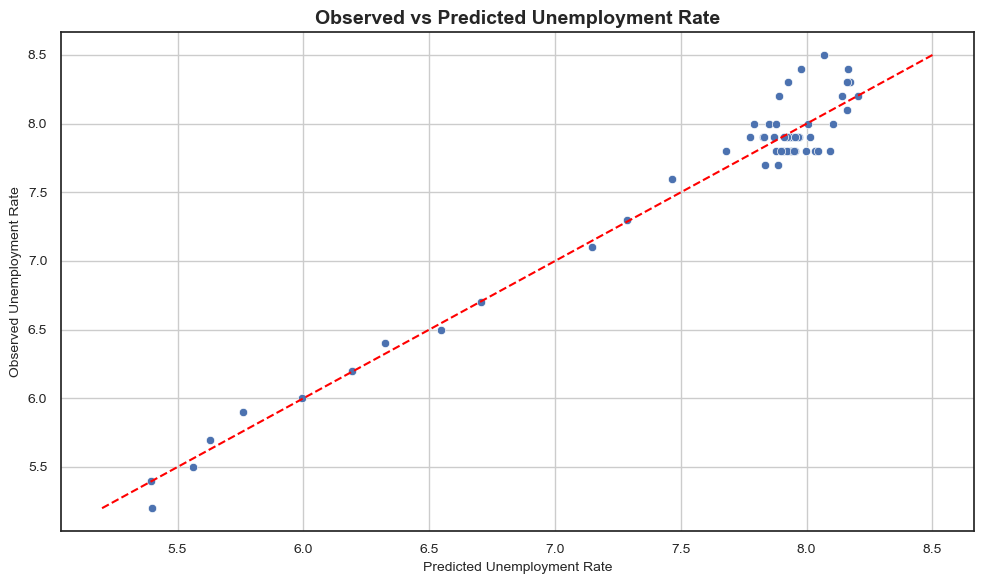

In [51]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['unemployment_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Unemployment Rate', fontsize=10)
plt.ylabel('Observed Unemployment Rate', fontsize=10)

# Title
plt.title('Observed vs Predicted Unemployment Rate', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

#### Good correlation between the predicted and observed unemployment rate percentage change. This indicates that the model is capturing the overall direction of the relationship, albeit consistently with some variation as denoted by the scatter points situated further away from the red line. There might be some heteroscedasticity due to the cluster in the top right. 

### Training and testing subsets with MLR

In [55]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [57]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                               OLS Regression Results                              
Dep. Variable:     unemployment_rate (t=x)   R-squared:                       0.949
Model:                                 OLS   Adj. R-squared:                  0.941
Method:                      Least Squares   F-statistic:                     118.6
Date:                     Sun, 18 May 2025   Prob (F-statistic):           4.68e-23
Time:                             21:57:34   Log-Likelihood:                 17.353
No. Observations:                       45   AIC:                            -20.71
Df Residuals:                           38   BIC:                            -8.060
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### <span style="color: orange;"> R-square of 94.9% i.e. when applied to the training data set. This is a high R-squared value, suggesting a good fit of the model to the data, although likely over fitting. 

### <span style="color: orange;"> Adj. R-squared of 94.1% is the same as the R-squared, which is expected with a good number of observations and a relatively small number of predictors. It also indicates a strong model fit.

### <span style="color: orange;"> p-values show tha tonly the last three features are signifigant FTSE, BoE and 2 yr Gilt (all <0.05).

### <span style="color: orange;"> Durbin-Watson test score is close to 2, which suggests little to no autocorreleation in the residuals.

### <span style="color: orange;"> Jarque-Bera (JB) of 3.598 and associated p-value of >5% are indicators for the normality of the residuals i.e. we do not have strong evidence to reject the null hypothesis of normally distributed residuals. To check on histogram or Q-Q plot.

### <span style="color: orange;"> Condition number is of 5.91e+05 is very high, suggesting multicollinearity. To check for multicollinearity measuring the VIF (Variance Inflation Factor) in later steps.

In [60]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [62]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [8.17246398 7.97611803 6.53003059 7.94892196 6.20384767 5.80795404
 7.95076347 7.87232344 7.92087024 8.16645412 7.9335725  8.09989046
 7.79672735 6.6704513  7.91719436 7.87310684 7.91899697 8.0559243
 8.03817444 7.95418196 7.25290169 7.93172619 8.02152506 8.11731424
 7.95692135 8.00263719 5.44931701 7.82456342 5.61335769 8.17398033
 7.91311448 7.90791785 7.78809688 8.14708288 7.10691166 7.84300886
 7.92205457 7.97017563 7.8344935  6.33090779 8.09141174 7.72760263
 7.93506951 8.02848463 7.90145524]


In [64]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [5.45105727 6.01972538 7.93545266 7.6267009  7.9334547  8.01317387
 7.91998765 7.95176993 8.16803868 7.42297427 8.20459917 5.67816569]


In [66]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

98.1715610300699


### <span style="color: orange;"> R-square of 98% when the multiple linear regression model based on the training data set is applied to the testing data set. Way too high. Likely overfit. 

### Check for multicollinearity

In [68]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0      9680.4                          const
1        26.4      unemployment_rate (t=x-3)
2         1.9       wage_growth_rate (t=x-3)
3         5.3           GDP_pct_change (t=x)
4         2.0  ftse_250_total_return (t=x-3)
5        22.4          BoE_base_rate (t=x-3)
6         8.9     0-2yr_gilts_TReturns (t=x)


### <span style="color: orange;"> Observations from the VIF output:

### - VIF Factor of close to 1.9 for both wage_growth and ftse_250_total_return indicates that there is little multicollinearity between the two variables. 

### - VIF Factor of between 2-3 for wage growth and FTSE 250 indicates acceptable levels of multicollinearity

###  - All others have too high VIF: lagged unemployment, GDP, Base Rate, 2 yr Gilt. 

### - VIF Factor of above 3 for the intercept (constant) is not relevant because it is not an independent variable, therefore having a high VIF doesn't indicate a problem with the model's predictive power of stability of the coefficients of the other variables

### Check for heteroscedasticity

In [71]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [73]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 12.929219680109757, 'LM Test p-value': 0.044173815051529494, 'F-stat': 2.553260543000991, 'F-test p-value': 0.0355051523518431}


### The Breusch-Pagan test results show heteroscedasticity is present. 

### Check normality of regression residuals - assumption of MLR

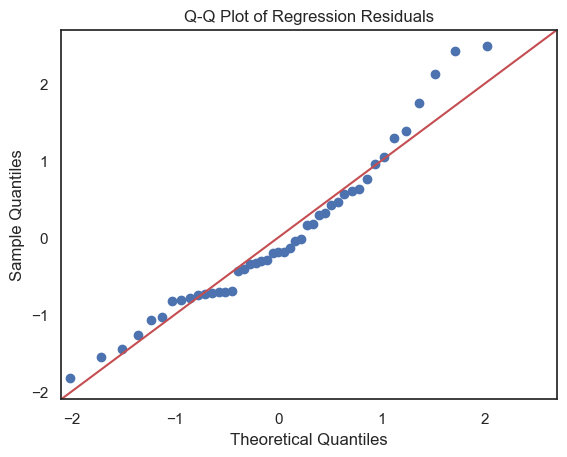

In [75]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

### Most of the points lie along the 45° red line, indicating that the regression's residuals are approximately normally distributed.

### However, there are some deviation in the tails (especially top-right), which suggests slight skewness or potential outliers.

### But overall, normality seems mostly satisfied.

## Evaluate the model

In [77]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.11111175538352598
Mean Square Error (Final): 0.018690709470406148


### <span style="color: orange;">  On average, the model's predictions for Unemployment Rate change deviate from the actual values by about 0.111 percent (MAE). On the other hand, the average of the squared prediction errors is approximately 0.0186 percent (MSE).

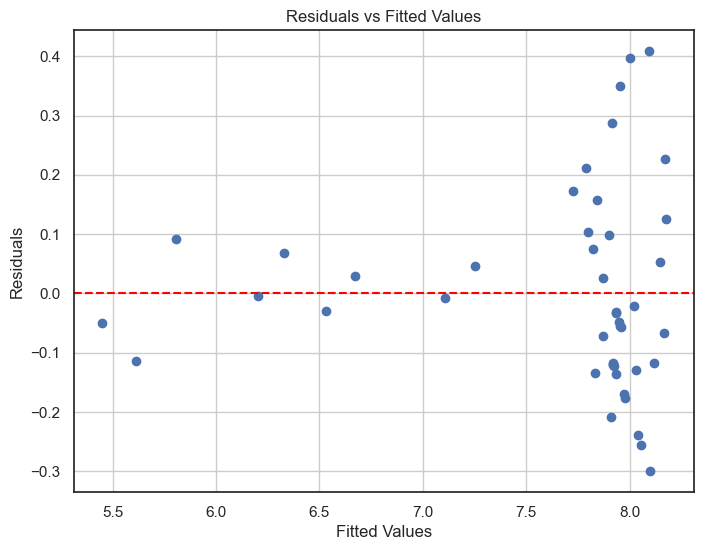

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

### Observations:

classic heteroscedasticity

## Multiple linear regression: Drop 

# Re-perform MLR without GDP, Base Rate and Gilt as independent variables. 

In [87]:
# Define the dependent variable
y = regression_df['unemployment_rate (t=x)']

# Define the independent variable(s)
X = regression_df[
    ['wage_growth_rate (t=x-3)', 'ftse_250_total_return (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [89]:
# Call the predictions for X (array).
mlr.predict(X)

array([6.85641696, 6.95638639, 6.78924758, 6.65880179, 6.61893663,
       6.61892602, 6.73183828, 6.96528733, 6.75671347, 6.4595553 ,
       6.52422976, 6.5788052 , 7.14526473, 8.02084865, 8.44432031,
       8.31351401, 7.57665714, 7.35372916, 7.56872718, 7.73042596,
       7.8309722 , 7.81641004, 7.79218911, 7.8719408 , 7.43691121,
       6.6135971 , 6.68397059, 7.12100549, 7.79518506, 7.81172296,
       7.86421981, 7.81141268, 7.89320998, 7.89267179, 7.81625184,
       7.97789219, 7.70216117, 7.76663647, 7.70082236, 8.02275289,
       7.94296083, 7.89150319, 7.72017276, 7.55229184, 7.57755623,
       7.81363924, 7.78451983, 7.74552938, 8.11264815, 8.38578215,
       8.47415253, 8.23127591, 7.99850328, 8.04948198, 8.12935136,
       8.12863544, 8.17142831])

In [91]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.4874085811799379
Intercept:  6.286959904122167
Coefficients:


[('wage_growth_rate (t=x-3)', -0.3255816180012547),
 ('ftse_250_total_return (t=x-3)', 0.0003291444318732561)]

Observation: 
- explaine 48% of the predictions

Coefficients: 
-'wage_growth_rate (t=x-3)', -0.3255816180012547) = looks like wage growth addresses unemployment
-'ftse_250_total_return (t=x-3)', 0.0003291444318732561)] = tiny 

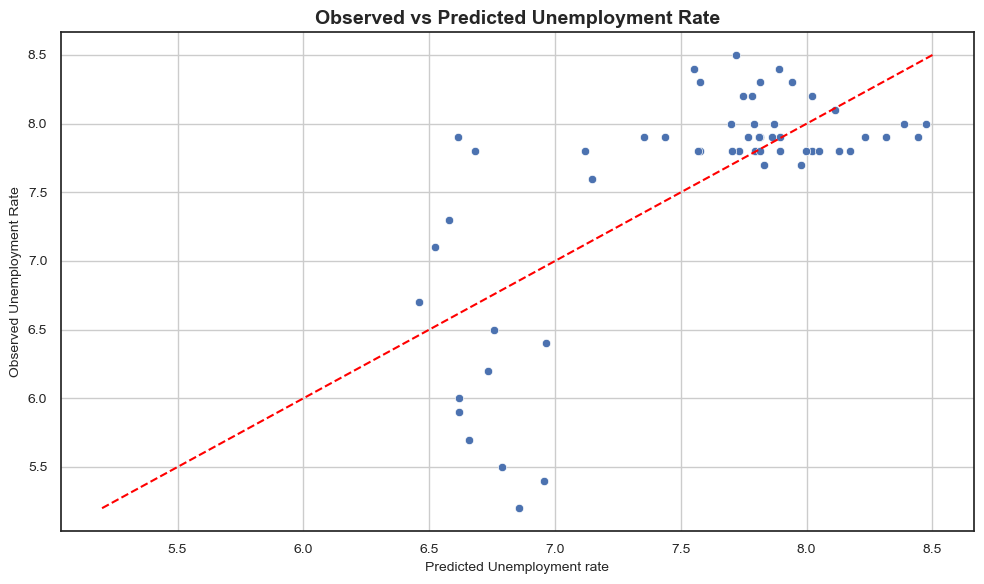

In [94]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['unemployment_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Unemployment rate', fontsize=10)
plt.ylabel('Observed Unemployment Rate', fontsize=10)

# Title
plt.title('Observed vs Predicted Unemployment Rate', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

# <span style="color: red;"> This is hugely non- linear so I'm going to skip to the Fandom Forrest and XGBoost

### Training and testing subsets with MLR

In [373]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [374]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                             OLS Regression Results                             
Dep. Variable:     CPI_pct_change (t=x)   R-squared:                       0.854
Model:                              OLS   Adj. R-squared:                  0.847
Method:                   Least Squares   F-statistic:                     122.7
Date:                  Fri, 16 May 2025   Prob (F-statistic):           2.87e-18
Time:                          10:28:29   Log-Likelihood:                -19.985
No. Observations:                    45   AIC:                             45.97
Df Residuals:                        42   BIC:                             51.39
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [376]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                       features
0        28.7                          const
1         1.2         CPI_pct_change (t=x-1)
2         1.2  ftse_250_total_return (t=x-3)


### No multicollinearity observed from the VIF output

In [378]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [379]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 0.3910019429458478, 'LM Test p-value': 0.995573811857266, 'F-stat': 0.06836771252017254, 'F-test p-value': 0.996520249811453}


### Very large p-value: strong evidence for the null hypothesis of homoskedasticity.

# <span style="color: orange;"> Given the model output above, multiple linear regression is likely a good ML model to describe inflation. We will explore Random Forest / XGBoost next

In [100]:
regression_df.describe()

,Date,unemployment_rate (t=x),unemployment_rate (t=x-3),wage_growth_rate (t=x-3),GDP_pct_change (t=x),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3),0-2yr_gilts_TReturns (t=x)
count,57,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2010-08-01 06:44:12.631578880,7.571930,7.436842,1.956140,-0.028070,5838.935965,1.323921,177.753070
min,2008-04-01 00:00:00,5.200000,5.200000,-2.900000,-2.100000,3487.350000,0.382022,164.014000
25%,2009-06-01 00:00:00,7.700000,7.300000,1.100000,-0.100000,5240.250000,0.421348,176.113000
50%,2010-08-01 00:00:00,7.800000,7.800000,1.900000,0.100000,5917.490000,0.460674,179.336000
75%,2011-10-01 00:00:00,8.000000,8.000000,2.800000,0.600000,6937.540000,0.500000,181.559000
max,2012-12-01 00:00:00,8.500000,8.500000,4.900000,1.100000,7505.870000,5.375000,182.796000
std,NaN,0.814764,0.967255,1.545618,0.909818,1160.809906,1.719678,4.964887


In [102]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 221 to 277
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           57 non-null     datetime64[ns]
 1   unemployment_rate (t=x)        57 non-null     float64       
 2   unemployment_rate (t=x-3)      57 non-null     float64       
 3   wage_growth_rate (t=x-3)       57 non-null     float64       
 4   GDP_pct_change (t=x)           57 non-null     float64       
 5   ftse_250_total_return (t=x-3)  57 non-null     float64       
 6   BoE_base_rate (t=x-3)          57 non-null     float64       
 7   0-2yr_gilts_TReturns (t=x)     57 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 4.0 KB


In [104]:
regression_df.head()

,Date,unemployment_rate (t=x),unemployment_rate (t=x-3),wage_growth_rate (t=x-3),GDP_pct_change (t=x),ftse_250_total_return (t=x-3),BoE_base_rate (t=x-3),0-2yr_gilts_TReturns (t=x)
221,2008-04-01,5.2,5.2,3.8,-0.5,5488.98,5.375000,164.468
222,2008-05-01,5.4,5.2,3.6,-0.5,5594.87,5.250000,164.014
223,2008-06-01,5.5,5.3,4.1,-1.5,5581.66,5.125000,164.459
224,2008-07-01,5.7,5.2,4.6,-1.5,5679.93,5.000000,165.849
225,2008-08-01,5.9,5.4,4.7,-1.5,5657.73,4.916667,166.933


Root Mean Squared Error: 0.2373
Mean Squared Error: 0.0563
Mean Absolute Error: 0.1530
R² Score: 0.9433


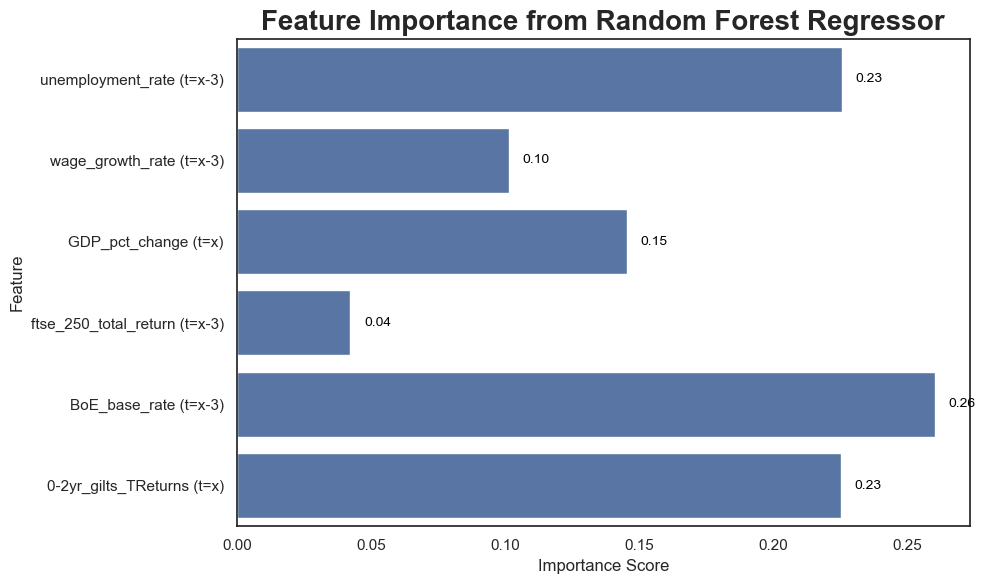

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=['unemployment_rate (t=x)', 'unemployment_rate (t=x-3)',
   'wage_growth_rate (t=x-3)', 'GDP_pct_change (t=x)',
    'ftse_250_total_return (t=x-3)', 'BoE_base_rate (t=x-3)',
    '0-2yr_gilts_TReturns (t=x)'
    ]
)

# Define features and target
X = regression_df[
    ['unemployment_rate (t=x-3)',
   'wage_growth_rate (t=x-3)', 'GDP_pct_change (t=x)',
    'ftse_250_total_return (t=x-3)', 'BoE_base_rate (t=x-3)',
    '0-2yr_gilts_TReturns (t=x)'
    ]
]
y = regression_df['unemployment_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)  # Save the axes object
plt.title(
    "Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold'
)
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(
        value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10
    )  # Use the saved 'ax'
plt.tight_layout()
plt.show()

Observation: 
- base rate drives unemployment rate, likely due to resetrictions made at the time of the financial crisis

Root Mean Squared Error: 0.2420
Mean Squared Error: 0.0586
Mean Absolute Error: 0.1761
R² Score: 0.9410


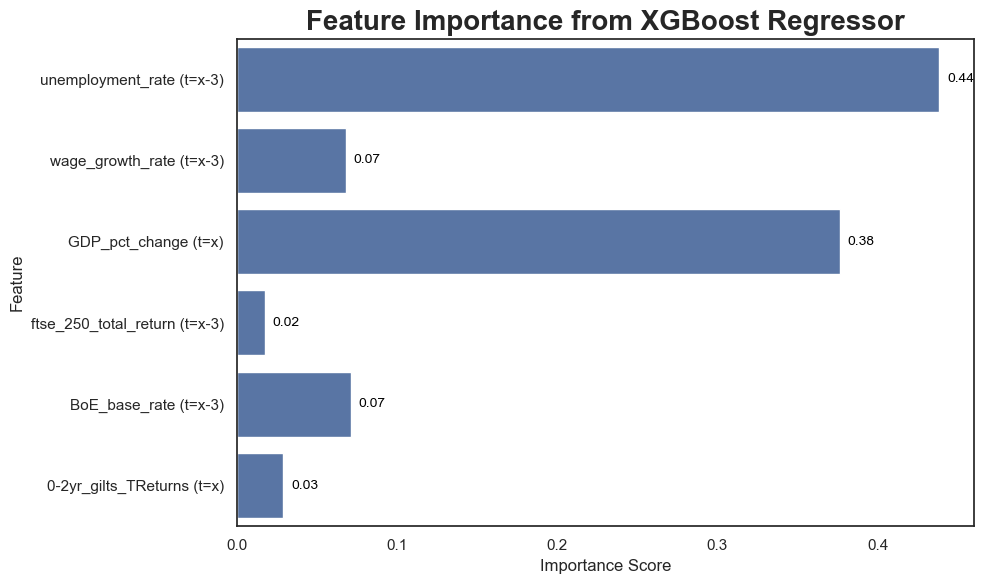

In [112]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the data
# -------------------
# Use only non-null rows
regression_df = regression_df.dropna(
    subset=['unemployment_rate (t=x)', 'unemployment_rate (t=x-3)',
   'wage_growth_rate (t=x-3)', 'GDP_pct_change (t=x)',
    'ftse_250_total_return (t=x-3)', 'BoE_base_rate (t=x-3)',
    '0-2yr_gilts_TReturns (t=x)'
    ]
)

# Define features and target
X = regression_df[
    ['unemployment_rate (t=x-3)',
   'wage_growth_rate (t=x-3)', 'GDP_pct_change (t=x)',
    'ftse_250_total_return (t=x-3)', 'BoE_base_rate (t=x-3)',
    '0-2yr_gilts_TReturns (t=x)'
    ]
]
y = regression_df['unemployment_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',  # use squared error for regression
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels to the right of each bar
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

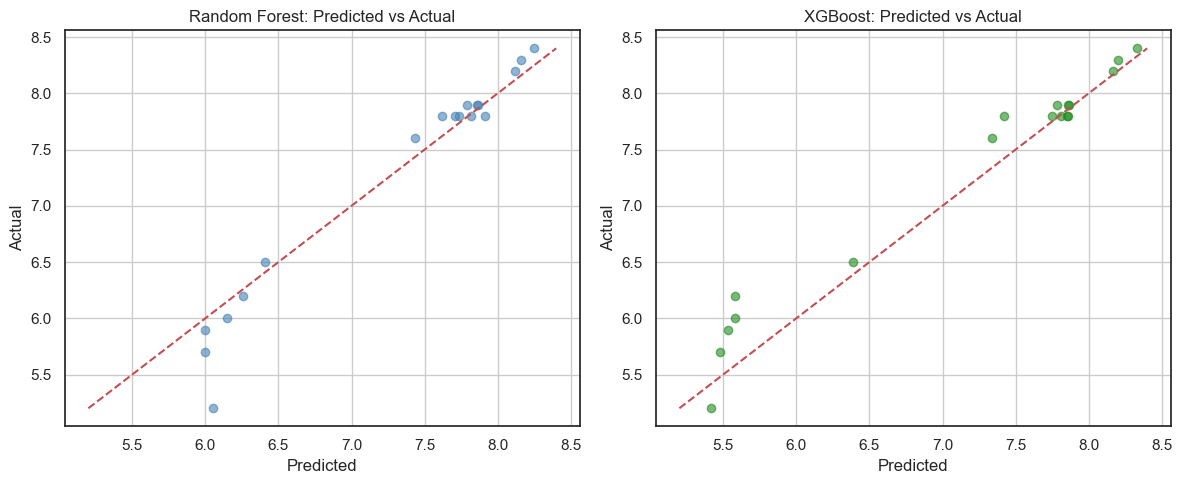

In [114]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both Random Forest shows a stronger preductor then GXBoost for things that influence the unemployment rate. 

Inflation dictates the unemployment rate.